# Analyse

In [72]:
import pandas as pd
import seaborn as sns
#from matplotlib import pyplot as plt

In [193]:
#data = pd.read_csv("figures/dolap25/csv/error_13-12-24:20:49:43_F100K.csv", index_col=0)
#data = data.loc[data['Pair'] == '(\'UA\', \'HA\')' ]
#data = pd.read_csv("figures/dolap25/csv/f1-r@k_13-12-24:20:49:43_F100K.csv", index_col=0)
## timings
#data = pd.read_csv("figures/dolap25/csv/times-14-12-24:10:43:10_F100K-tests.csv", index_col=0) # for type of tests
#data = pd.read_csv("figures/dolap25/csv/times-14-12-24:09:38:05_F100K.csv", index_col=0)
#data = pd.read_csv("figures/dolap25/csv/times-10-12-24:16:24:21_F600K-curated.csv", index_col=0, sep=';')
#data = pd.read_csv("figures/dolap25/csv/times-10-12-24:14:24:38_SSB.csv", index_col=0)
## by cuboid
#data = pd.read_csv("figures/dolap25/csv/times-17-12-24:11:57:01_F100K.csv", index_col=0)
#data = pd.read_csv("figures/dolap25/csv/times-17-12-24:12:34:40_F600K.csv", index_col=0)
data = pd.read_csv("figures/dolap25/csv/times-18-12-24:12:01:24_SSB.csv", index_col=0)
# new tests
data = pd.read_csv("results/times-06-02-25:18:56:19_health.csv", index_col=0)
##data = pd.read_csv("results/Welch-Permutations.csv", sep=';', index_col=0)
#data['Initial Sample'] = data['Initial Sample'].astype(str)
#data['index'] = data['count'].astype(str)
#data['Ratio cuboid'] = data['Ratio cuboid'].astype(str)
#data['Test'] = data['Test'].astype(str)
#data['sample ratio'] = data['sample ratio'].astype(str)


In [167]:
data.head()

,Runs,Index,count,Time,Ratio cuboid,sample ratio,Test
0,0,False,1,0.894952,0.4,0.10,stat
1,0,False,1,1.510110,0.4,0.25,stat
2,0,False,1,3.589478,0.4,0.50,stat
3,0,False,1,3.905126,0.4,0.75,stat
4,0,False,1,6.411923,0.4,1.00,stat


In [90]:
pivot = pd.pivot_table(data, values="F1 on Queries", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
#pivot = pd.pivot_table(data, values="F1 on Queries", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
pivot

Query Sample,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Initial Sample,,,,,,,,,,
0.1,0.997765,0.996648,0.997753,1.000000,0.995518,0.997765,0.997753,0.997765,0.997765,1.000000
0.2,0.996648,0.997753,0.997765,0.996648,0.997765,0.997765,0.998883,1.000000,0.998883,0.998883
0.3,1.000000,0.998883,1.000000,0.998883,0.998883,1.000000,1.000000,0.998883,0.998883,1.000000
0.4,1.000000,0.998883,1.000000,1.000000,1.000000,1.000000,0.998883,1.000000,1.000000,1.000000
0.5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Query Sample', ylabel='Initial Sample'>

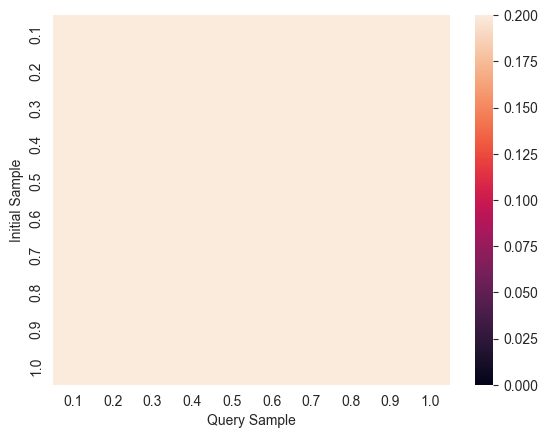

In [91]:
sns.heatmap(pivot, vmin=0, vmax=0.2)

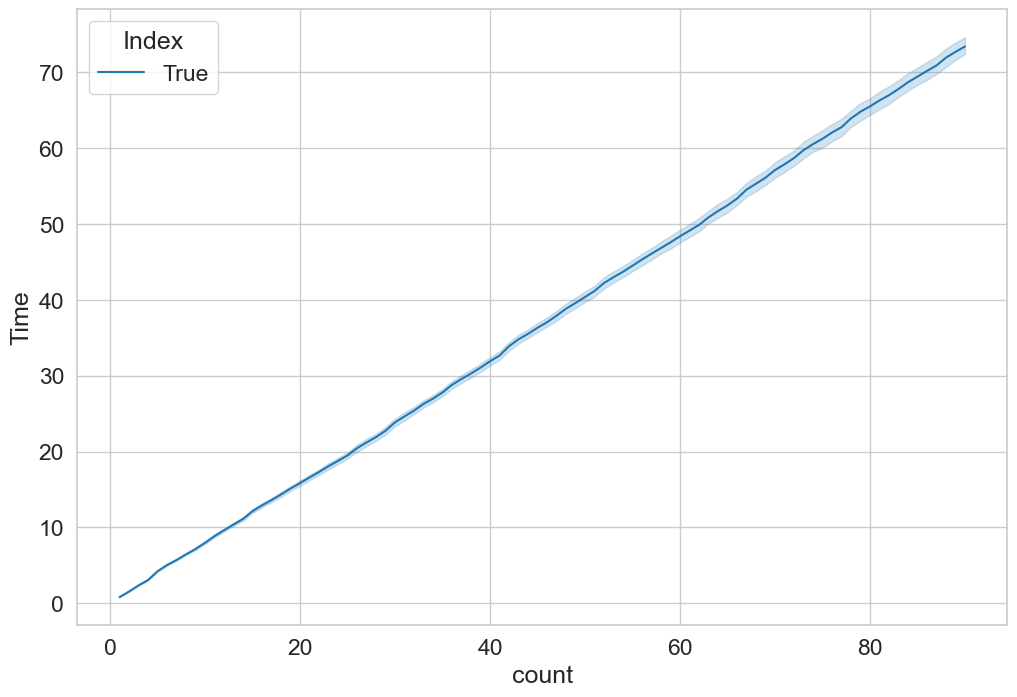

In [194]:
from matplotlib import pyplot as plt

a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
#ax.tick_params(axis='both', which='major', labelsize=16)
sns.set_theme(style="whitegrid", font_scale=1.5)
#ax.set_yscale('log')
#x='Runs'
x="count"
#x='sample ratio'
#hue='Ratio violations'
y="Time"
hue="Index"
#x="Ratio cuboids"
#hue="Ratio cuboids"
#hue='sample ratio'
#hue='Test'
#x= "Query Sample"
#y = "Error on lattice"
#y = "Error on materialized"
#y="Prediction"
#y = "F1 on Queries"
#y = "F1 on Lattice"
#y= "Number of Welch"
#y= "Number of Comparisons"
#y= "Recall@k on Queries"
#y= "Recall@k on Lattice"
#hue="Initial Sample"
plot=sns.lineplot(ax=ax,data=data,x=x,y=y,hue=hue,palette='tab10',legend='full')
#plot=sns.boxplot(ax=ax,data=data, x=x, y=y, hue=hue,palette='tab10',legend='full')
#plt.legend(loc='lower right', title='Initial Sample')

In [190]:
save=plot.get_figure()
name="figures/dolap25/newFigures/byCuboid_SSBTime_sampleRatio_ratioViolations.png"
#name="figures/test_"+y+"_"+x+"_"+hue+".png"
save.savefig(name)